In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paula/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [350]:
# Load data
talents = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
talents

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


# Prepare data for finding similarity metrics

In [163]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Vectorizing Columns for similarities

looks at text similarity <br>
1 - Bin connections <br>
2 - Sentence transformer, it will create a model <br>
3 - Fuzzy similarity. fuzzywuzzy. <br>
4-  Function that returns the similarity score <br>
5 - Two complexities: Text Embedding, converting & 

Snippet

from sentence_transformers import SentenceTransformer, util

sent_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

from fuzzywuzzy import fuzz
def sentence_similarity(title, target_title, model):
        sentences = [title, target_title]

        

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

        similarity_score = util.pytorch_cos_sim(embedding_1, embedding_2)
        
        return similarity_score.numpy()[0][0]
        
https://www.sbert.net/


In [166]:
# Merge all columns in one of the dataframe
talents['text_for_vectorizing'] = talents.job_title+ " " +talents.location + " " + talents.connection
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,2019 C.T. Bauer College of Business Graduate (...
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,Native English Teacher at EPIK (English Progra...
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,Aspiring Human Resources Professional Raleigh-...
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,"People Development Coordinator at Ryan Denton,..."
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,Advisory Board Member at Celal Bayar Universit...


In [167]:
# Will set up both count vectorizer and tfidf to compare afterwards metrics on both approaches
tfidf_vect = TfidfVectorizer(stop_words={'en'})
talents_tfidf_vect = tfidf_vect.fit_transform(talents.text_for_vectorizing)


In [168]:
#Save it in a dataframe
talents_tfidf_df= pd.DataFrame(talents_tfidf_vect.todense(),columns=tfidf_vect.get_feature_names())
talents_tfidf_df

,103,155,16,174,18,19,2019,2020,212,2621,...,western,westfield,with,within,woodlands,work,world,worth,york,zmir
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.287908,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.353651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.262021,0.0,0.0,0.0,0.0,0.0,0.000000,0.262021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
100,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
101,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269716,0.000000
102,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [160]:
#With Countvectorizer
count_vect = CountVectorizer(stop_words={'en'})
talents_count_vect = count_vect.fit_transform(talents.text_for_vectorizing)
talents_count_df= pd.DataFrame(talents_count_vect.todense(),columns=count_vect.get_feature_names())
talents_count_df

,103,155,16,174,18,19,2019,2020,212,2621,...,western,westfield,with,within,woodlands,work,world,worth,york,zmir
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing data


In [351]:
# Bin connections
talents.connection.replace('500+ ','500',inplace=True)
talents.astype({'connection': 'int32'})
talents.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500,NaN


In [352]:
talents.connection.unique()


array(['85', '500', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [353]:
bins = [0, 50, 100, 200, 300, 400, 500]
labels = [1,2,3,4,5,6]
talents['binned_connections'] = pd.cut(talents['connection'].astype(int), bins=bins, labels=labels)
talents.head()

,id,job_title,location,connection,fit,binned_connections
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,2
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500,NaN,6
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,1
3,4,People Development Coordinator at Ryan,"Denton, Texas",500,NaN,6
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500,NaN,6


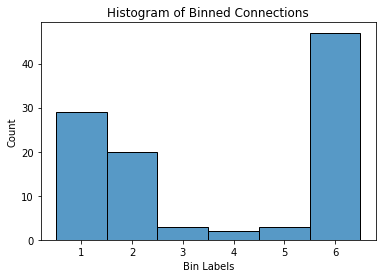

In [354]:
# Histogram of bins
sns.histplot(talents['binned_connections'])
plt.xlabel('Bin Labels')
plt.ylabel('Count')
plt.title('Histogram of Binned Connections')
plt.show()

In [355]:
# Using sentence transformers
from sentence_transformers import SentenceTransformer, util

sent_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [356]:
# Declare key words
key_words_1 = 'Aspiring human resources'
key_words_2 = 'seeking human resources'

In [357]:
# Transforming key words
key_transformed_1 = sent_model.encode(key_words_1, convert_to_tensor=True)
key_transformed_2 = sent_model.encode(key_words_2, convert_to_tensor=True)

In [358]:
# Remove punctuation
talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
talents['location']=talents.location.str.replace('[^\w\s]','')
talents.head()

<ipython-input-358-24cb35c2c4cc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
<ipython-input-358-24cb35c2c4cc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['location']=talents.location.str.replace('[^\w\s]','')


,id,job_title,location,connection,fit,binned_connections
0,1,2019 CT Bauer College of Business Graduate Mag...,Houston Texas,85,NaN,2
1,2,Native English Teacher at EPIK English Program...,Kanada,500,NaN,6
2,3,Aspiring Human Resources Professional,RaleighDurham North Carolina Area,44,NaN,1
3,4,People Development Coordinator at Ryan,Denton Texas,500,NaN,6
4,5,Advisory Board Member at Celal Bayar University,İzmir Türkiye,500,NaN,6


In [359]:
# Lower case all words
talents['job_title']=talents.job_title.str.lower()
talents['location']=talents.location.str.lower()
talents.head()

,id,job_title,location,connection,fit,binned_connections
0,1,2019 ct bauer college of business graduate mag...,houston texas,85,NaN,2
1,2,native english teacher at epik english program...,kanada,500,NaN,6
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1
3,4,people development coordinator at ryan,denton texas,500,NaN,6
4,5,advisory board member at celal bayar university,i̇zmir türkiye,500,NaN,6


In [360]:
# Removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords

def remove_sw(row):
    stop_words = set(stopwords.words('english'))
  
    word_tokens = word_tokenize(row)
  
    return ' '.join([w for w in word_tokens if not w.lower() in stop_words])

talents['job_title'] =talents.job_title.apply(remove_sw)
talents.head()

,id,job_title,location,connection,fit,binned_connections
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2
1,2,native english teacher epik english program korea,kanada,500,NaN,6
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1
3,4,people development coordinator ryan,denton texas,500,NaN,6
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6


In [361]:
talents['text_for_vectorizing'] = talents.job_title+ " " +talents.location 
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...


# Similarity metrics

## Using Fuzzy Library

In [362]:
from fuzzywuzzy import fuzz, process

In [363]:
# Test similar row to check score
round(fuzz.token_sort_ratio(key_words_1,talents.job_title.iloc[2])/100,3)

0.79

In [364]:
# Create function for fuzzy similarity
def sentence_fuzzy_similarity(title, target_title):
        return round(fuzz.token_sort_ratio(title,target_title)/100,3)

In [365]:
talents['fuzzy_key_1'] = round(talents.text_for_vectorizing.apply(sentence_fuzzy_similarity, args=(key_words_1,)),3)
talents['fuzzy_key_2'] = round(talents.text_for_vectorizing.apply(sentence_fuzzy_similarity, args=(key_words_2,)),3)
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,fuzzy_key_1,fuzzy_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.37,0.26
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.32,0.28
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.51,0.32
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas,0.33,0.28
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.29,0.32


## Using Cosine Similarity

In [186]:
def sentence_cos_similarity(title, target_title, model):
        sentences = [title, target_title]

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

        similarity_score = util.pytorch_cos_sim(embedding_1, embedding_2)
        
        return similarity_score.numpy()[0][0]

In [187]:
sentence_cos_similarity(key_words_1,talents.job_title.iloc[0],sent_model)

0.56675386

In [366]:
# Applying to both key words
talents['cosine_key_1'] = round(talents.text_for_vectorizing.apply(sentence_cos_similarity, args=(key_words_1,sent_model)),3)
talents['cosine_key_2'] = round(talents.text_for_vectorizing.apply(sentence_cos_similarity, args=(key_words_2,sent_model)),3)
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.37,0.26,0.527,0.417
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.32,0.28,0.148,0.142
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.51,0.32,0.797,0.725
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas,0.33,0.28,0.392,0.384
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.29,0.32,0.244,0.222


## Using Euclidian similarity

In [189]:
from sklearn.metrics.pairwise import euclidean_distances

In [190]:
def sentence_eucl_distance(title, target_title, model):
        sentences = [title, target_title]

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)
        
        return round(euclidean_distances(embedding_1.reshape(1,-1),embedding_2.reshape(1,-1))[0][0],3)

In [191]:
a = sent_model.encode(key_words_1,convert_to_tensor=True).reshape(1,-1)

In [192]:
b= sent_model.encode(talents.text_for_vectorizing.iloc[0],convert_to_tensor=True).reshape(1,-1)

In [193]:
euclidean_distances(a,b)

array([[0.97309756]], dtype=float32)

In [367]:
# Finding euclidian distances
talents['eucl_distance_key_1']=talents.text_for_vectorizing.apply(sentence_eucl_distance,args=(key_words_1,sent_model))
talents['eucl_distance_key_2']=talents.text_for_vectorizing.apply(sentence_eucl_distance,args=(key_words_2,sent_model))
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.37,0.26,0.527,0.417,0.973,1.080
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.32,0.28,0.148,0.142,1.305,1.310
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.51,0.32,0.797,0.725,0.637,0.742
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas,0.33,0.28,0.392,0.384,1.103,1.110
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.29,0.32,0.244,0.222,1.230,1.247


In [368]:
# Convert distance into Probability
def eucl_to_prob(distance,df):

    return (1/(distance**2))/(np.sum((1/df.eucl_distance)**2))

def eucl_to_prob_1(distance,df):

    return (1/(distance**2))/(np.sum((1/df.eucl_distance_key_1)**2))
def eucl_to_prob_2(distance,df):

    return (1/(distance**2))/(np.sum((1/df.eucl_distance_key_2)**2))

In [370]:
talents['eucl_prob_key_1']=talents.eucl_distance_key_1.apply(eucl_to_prob_1,args=(talents,))
talents['eucl_prob_key_2']=talents.eucl_distance_key_2.apply(eucl_to_prob_2,args=(talents,))
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2,eucl_prob_key_1,eucl_prob_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.37,0.26,0.527,0.417,0.973,1.080,0.008650,0.007488
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.32,0.28,0.148,0.142,1.305,1.310,0.004809,0.005089
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.51,0.32,0.797,0.725,0.637,0.742,0.020183,0.015863
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas,0.33,0.28,0.392,0.384,1.103,1.110,0.006731,0.007088
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.29,0.32,0.244,0.222,1.230,1.247,0.005413,0.005616


## Using Jaccard similarity

In [223]:
!pip install textdistance

You should consider upgrading via the '/Users/paula/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [224]:
from sklearn.metrics import jaccard_score
import textdistance

In [236]:
def sentence_jaccard_similiarity(title, target_title):
        
        
        return round(textdistance.jaccard.normalized_similarity(title,target_title),3)

In [371]:
# Input into dataframe
talents['jaccard_simil_key_1'] = talents.text_for_vectorizing.apply(sentence_jaccard_similiarity,args=(key_words_1,))
talents['jaccard_simil_key_2'] = talents.text_for_vectorizing.apply(sentence_jaccard_similiarity,args=(key_words_2,))
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2,eucl_prob_key_1,eucl_prob_key_2,jaccard_simil_key_1,jaccard_simil_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.37,0.26,0.527,0.417,0.973,1.080,0.008650,0.007488,0.213,0.204
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.32,0.28,0.148,0.142,1.305,1.310,0.004809,0.005089,0.333,0.339
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.51,0.32,0.797,0.725,0.637,0.742,0.020183,0.015863,0.319,0.306
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas,0.33,0.28,0.392,0.384,1.103,1.110,0.006731,0.007088,0.286,0.291
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.29,0.32,0.244,0.222,1.230,1.247,0.005413,0.005616,0.258,0.281


## Using Levensthein similarity

In [261]:
from strsimpy.normalized_levenshtein import NormalizedLevenshtein

In [263]:
leven = NormalizedLevenshtein()
leven.similarity(key_words_1,talents.text_for_vectorizing.iloc[2])

0.323943661971831

In [266]:
def leven_similarity(title,target_title):
    leven = NormalizedLevenshtein()
    return round(leven.similarity(title,target_title),3)

In [372]:
talents['leven_key_1']=talents.text_for_vectorizing.apply(leven_similarity,args=(key_words_1,))
talents['leven_key_2']=talents.text_for_vectorizing.apply(leven_similarity,args=(key_words_2,))
talents.head()


,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2,eucl_prob_key_1,eucl_prob_key_2,jaccard_simil_key_1,jaccard_simil_key_2,leven_key_1,leven_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.37,0.26,0.527,0.417,0.973,1.080,0.008650,0.007488,0.213,0.204,0.215,0.206
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.32,0.28,0.148,0.142,1.305,1.310,0.004809,0.005089,0.333,0.339,0.196,0.196
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.51,0.32,0.797,0.725,0.637,0.742,0.020183,0.015863,0.319,0.306,0.324,0.282
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas,0.33,0.28,0.392,0.384,1.103,1.110,0.006731,0.007088,0.286,0.291,0.229,0.229
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.29,0.32,0.244,0.222,1.230,1.247,0.005413,0.005616,0.258,0.281,0.169,0.153


# Combine similarities for both key words and get an average

In [373]:
talents['similarity_key_1']=(talents['fuzzy_key_1']+talents['cosine_key_1']+talents['eucl_prob_key_1']+talents['jaccard_simil_key_1']+talents['leven_key_1'])/5
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2,eucl_prob_key_1,eucl_prob_key_2,jaccard_simil_key_1,jaccard_simil_key_2,leven_key_1,leven_key_2,similarity_key_1
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.37,0.26,0.527,0.417,0.973,1.080,0.008650,0.007488,0.213,0.204,0.215,0.206,0.266730
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.32,0.28,0.148,0.142,1.305,1.310,0.004809,0.005089,0.333,0.339,0.196,0.196,0.200362
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.51,0.32,0.797,0.725,0.637,0.742,0.020183,0.015863,0.319,0.306,0.324,0.282,0.394037
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas,0.33,0.28,0.392,0.384,1.103,1.110,0.006731,0.007088,0.286,0.291,0.229,0.229,0.248746
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.29,0.32,0.244,0.222,1.230,1.247,0.005413,0.005616,0.258,0.281,0.169,0.153,0.193283


In [374]:
talents['similarity_key_2']=(talents['fuzzy_key_2']+talents['cosine_key_2']+talents['eucl_prob_key_2']+talents['jaccard_simil_key_2']+talents['leven_key_2'])/5
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,fuzzy_key_1,fuzzy_key_2,cosine_key_1,...,eucl_distance_key_1,eucl_distance_key_2,eucl_prob_key_1,eucl_prob_key_2,jaccard_simil_key_1,jaccard_simil_key_2,leven_key_1,leven_key_2,similarity_key_1,similarity_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.37,0.26,0.527,...,0.973,1.080,0.008650,0.007488,0.213,0.204,0.215,0.206,0.266730,0.218898
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.32,0.28,0.148,...,1.305,1.310,0.004809,0.005089,0.333,0.339,0.196,0.196,0.200362,0.192418
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.51,0.32,0.797,...,0.637,0.742,0.020183,0.015863,0.319,0.306,0.324,0.282,0.394037,0.329773
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton texas,0.33,0.28,0.392,...,1.103,1.110,0.006731,0.007088,0.286,0.291,0.229,0.229,0.248746,0.238218
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.29,0.32,0.244,...,1.230,1.247,0.005413,0.005616,0.258,0.281,0.169,0.153,0.193283,0.196323


In [375]:
# Now I create a copy on the original dataframe and put the similarity column per key in fit
talents_copy = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
talents_copy.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [376]:
# Get a cleaner version of the dataframe
talents_key_1 = talents_copy.copy()
talents_key_1['fit'] = talents.similarity_key_1
talents_key_1.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,0.266730
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,0.200362
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.394037
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,0.248746
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,0.193283


In [377]:
# Get a cleaner version of the dataframe
talents_key_2 = talents_copy.copy()
talents_key_2['fit'] = talents.similarity_key_2
talents_key_2.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,0.218898
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,0.192418
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.329773
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,0.238218
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,0.196323


In [378]:
# Rank the dataframes
talents_key_1.sort_values(by='fit',ascending=False)

,id,job_title,location,connection,fit
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
...,...,...,...,...,...
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,0.176664
54,55,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,0.176664
92,93,Admissions Representative at Community medical...,"Long Beach, California",9,0.169337
95,96,Student at Indiana University Kokomo - Busines...,"Lafayette, Indiana",19,0.167681


In [379]:
# Rank the dataframes
talents_key_2.sort_values(by='fit',ascending=False)

,id,job_title,location,connection,fit
98,99,Seeking Human Resources Position,"Las Vegas, Nevada Area",48,0.454318
27,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.442398
29,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.442398
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,0.374448
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,0.374448
...,...,...,...,...,...
85,86,Information Systems Specialist and Programmer ...,"Gaithersburg, Maryland",4,0.182575
86,87,Bachelor of Science in Biology from Victoria U...,"Baltimore, Maryland",40,0.181478
92,93,Admissions Representative at Community medical...,"Long Beach, California",9,0.160645
95,96,Student at Indiana University Kokomo - Busines...,"Lafayette, Indiana",19,0.155738


# Create pipeline for starring candidates

In [399]:
def calculate_fit_score(key,talents,model, index = None):
    talents_final = talents.copy()
    
    talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
    talents['location']=talents.location.str.replace('[^\w\s]','')
    talents['job_title']=talents.job_title.str.lower()
    talents['location']=talents.location.str.lower()
    talents['job_title'] =talents.job_title.apply(remove_sw)
    talents['text_for_vectorizing'] = talents.job_title+ " " +talents.location 
    
    
    talents['fuzzy_similarity'] = round(talents.text_for_vectorizing.apply(sentence_fuzzy_similarity, args=(key,)),3)
    talents['cosine_similarity'] = round(talents.text_for_vectorizing.apply(sentence_cos_similarity, args=(key,model)),3)
    talents['eucl_distance']=talents.text_for_vectorizing.apply(sentence_eucl_distance,args=(key,model))
    talents['eucl_similarity']=talents.eucl_distance.apply(eucl_to_prob,args=(talents,))
    talents['jaccard_similarity'] = talents.text_for_vectorizing.apply(sentence_jaccard_similiarity,args=(key,))
    talents['leven_similarity']=talents.text_for_vectorizing.apply(leven_similarity,args=(key,))
    talents['similarity_score'] = (talents['fuzzy_similarity']+talents['cosine_similarity']+talents['eucl_similarity']+talents['jaccard_similarity']+talents['leven_similarity'])/5
    talents_final['fit'] = talents.similarity_score
    
    return talents_final.sort_values(by='fit',ascending=False)
    

In [415]:
talents_test = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
talents_test.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [416]:
star_df = calculate_fit_score(key_words_1,talents_test,sent_model)
star_df

<ipython-input-399-77d5216799a7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
<ipython-input-399-77d5216799a7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['location']=talents.location.str.replace('[^\w\s]','')


,id,job_title,location,connection,fit
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420453
...,...,...,...,...,...
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,0.176664
54,55,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,0.176664
92,93,Admissions Representative at Community medical...,"Long Beach, California",9,0.169337
95,96,Student at Indiana University Kokomo - Busines...,"Lafayette, Indiana",19,0.167681


In [422]:
# Creating df for keyword 2
talents_test_2 = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
star_df_2 = calculate_fit_score(key_words_2,talents_test_2,sent_model)
star_df_2

<ipython-input-399-77d5216799a7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
<ipython-input-399-77d5216799a7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['location']=talents.location.str.replace('[^\w\s]','')


,id,job_title,location,connection,fit
98,99,Seeking Human Resources Position,"Las Vegas, Nevada Area",48,0.454318
27,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.442398
29,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.442398
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,0.374448
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,0.374448
...,...,...,...,...,...
85,86,Information Systems Specialist and Programmer ...,"Gaithersburg, Maryland",4,0.182575
86,87,Bachelor of Science in Biology from Victoria U...,"Baltimore, Maryland",40,0.181478
92,93,Admissions Representative at Community medical...,"Long Beach, California",9,0.160645
95,96,Student at Indiana University Kokomo - Busines...,"Lafayette, Indiana",19,0.155738


# Test starred method

In [418]:
# Drop the star candidate and re rank
star_index = 35
star_df.drop(star_index,axis=0,inplace=True)
star_df.shape

(103, 5)

In [419]:
rerank_star_df = calculate_fit_score(key_words_1,star_df,sent_model)
rerank_star_df

<ipython-input-399-77d5216799a7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
<ipython-input-399-77d5216799a7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['location']=talents.location.str.replace('[^\w\s]','')


,id,job_title,location,connection,fit
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420529
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420529
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420529
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,0.420529
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,0.419517
...,...,...,...,...,...
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,0.176684
54,55,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,0.176684
92,93,Admissions Representative at Community medical...,"Long Beach, California",9,0.169356
95,96,Student at Indiana University Kokomo - Busines...,"Lafayette, Indiana",19,0.167702


In [423]:
# Second data frame
star_index_2 = 23
star_df_2.drop(star_index_2,axis=0,inplace=True)
star_df_2.shape

(103, 5)

In [424]:
rerank_star_df_2 = calculate_fit_score(key_words_2,star_df_2,sent_model)
rerank_star_df_2

<ipython-input-399-77d5216799a7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
<ipython-input-399-77d5216799a7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['location']=talents.location.str.replace('[^\w\s]','')


,id,job_title,location,connection,fit
98,99,Seeking Human Resources Position,"Las Vegas, Nevada Area",48,0.454385
27,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.442450
29,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.442450
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,0.374495
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,0.374495
...,...,...,...,...,...
85,86,Information Systems Specialist and Programmer ...,"Gaithersburg, Maryland",4,0.182594
86,87,Bachelor of Science in Biology from Victoria U...,"Baltimore, Maryland",40,0.181495
92,93,Admissions Representative at Community medical...,"Long Beach, California",9,0.160661
95,96,Student at Indiana University Kokomo - Busines...,"Lafayette, Indiana",19,0.155755


# Bonus questions

<b> - We are interested in a robust algorithm, tell us how your solution works and show us how your ranking gets better with each starring action. </b> <br>

    - For ranking candidates, we process 5 text similarities: euclidian, cosine, fuzzy, jaccard and levensthein. To get the fit column score, we make a mean of the mentioned metrics to get the final values. Each time a ranking is starred, the fit score increases marginally. For these cases, there are a lot of candidates with similar job titles and locations. It would be interesting to refit if there are unique values in the dataset, but it also  seems unrealistic that could happen.



<b> - How can we filter out candidates which in the first place should not be in this list? </b>

In [430]:
star_df.tail(20)['job_title']

85     information systems specialist programmer love...
91     seeking employment opportunities within custom...
1      native english teacher epik english program korea
31     native english teacher epik english program korea
44     native english teacher epik english program korea
19     native english teacher epik english program korea
15     native english teacher epik english program korea
47          advisory board member celal bayar university
34          advisory board member celal bayar university
4           advisory board member celal bayar university
22          advisory board member celal bayar university
86     bachelor science biology victoria university w...
101            business intelligence analytics travelers
41     svp chro marketing communications csr officer ...
63     svp chro marketing communications csr officer ...
11     svp chro marketing communications csr officer ...
54     svp chro marketing communications csr officer ...
92     admissions representativ

In [432]:
star_df_2.tail(20)['job_title']

101            business intelligence analytics travelers
94                    student westfield state university
22          advisory board member celal bayar university
34          advisory board member celal bayar university
4           advisory board member celal bayar university
47          advisory board member celal bayar university
15     native english teacher epik english program korea
31     native english teacher epik english program korea
1      native english teacher epik english program korea
19     native english teacher epik english program korea
44     native english teacher epik english program korea
11     svp chro marketing communications csr officer ...
63     svp chro marketing communications csr officer ...
41     svp chro marketing communications csr officer ...
54     svp chro marketing communications csr officer ...
85     information systems specialist programmer love...
86     bachelor science biology victoria university w...
92     admissions representativ

<b> It seems that poorly ranked candidates are based on wrongly imputing education on job title and acronyms 

<b> - Can we determine a cut-off point that would work for other roles without losing high potential candidates? </b>
    
    - 

<AxesSubplot:xlabel='fit', ylabel='Count'>

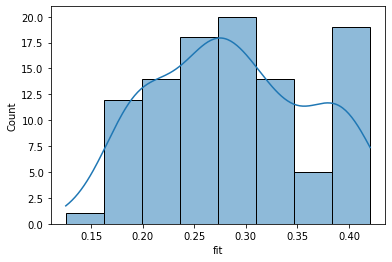

In [436]:
sns.histplot(star_df.fit,kde=True)

<b> I would set the cutoff point at a score of .35. Before that, it seems that there a lot of candidates kind of stuck in the middle

<b> - Do you have any ideas that we should explore so that we can even automate this procedure to prevent human bias? </b>
    
    - For decreasing bias, add more features (skills, experience, languages, etc) that will make the model more    robust. Increasing the pool of candidates will have the same efects as well.